

# Project: Investigate TMDB  - [TMDB 5000 Movie Dataset]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

>TMDb movie dataset contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue 
>### columns in this dataset : 
>- imdb_id
>- popularity
>- budget
>- revenue	
>- original_title 
>- cast 	
>- homepage	
>- director
>- tagline	
>- keywords	
>- overview	
>- runtime	
>- genres	
>- production_companies	
>- release_date	
>- vote_count	
>- vote_average
>- overview 	
>- runtime 	
>- genres 	
>- production_companies 	
>- elease_date 	
>- vote_count 	
>- vote_average 	
>- release_year 	
>- budget_adj 	
>- revenue_adj

    



### Question(s) for Analysis


>Question 1: deos the month release will affect the popularity or the vote_average

>Question 2: what is the most genres was made in the dataset and does the genere affect the the popularity





In [1]:
# set up import statements for all of the packages that I need to do the analysis.
import numpy as np
import pandas as pd
%matplotlib inline
import pylab as pl


<a id='wrangling'></a>
## Data Wrangling

>In this section I will clean the data to make it easy and good to be handled
----

this cell is to load the dataset `Database_TMDb_movie_data/tmdb-movies.csv` and by using `.shape` we will know how many columns and rows in this dataset

In [2]:
df = pd.read_csv("Database_TMDb_movie_data/tmdb-movies.csv")

df.shape

(10866, 21)

 will use `.info()` to know what columns are having non values and what are not

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

and this `.head` will show the first 5 rows of the dataset

In [4]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09



### Data Cleaning

 

First I will drop some columns that doesn't effect our work in this dataset

In [5]:
columns_to_be_deleted = ["homepage","cast","imdb_id","overview","tagline","keywords","id"]

df.drop(columns_to_be_deleted,axis=1,inplace=True)

df.columns

Index(['popularity', 'budget', 'revenue', 'original_title', 'director',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

will see sample of the dataset

In [6]:
#I Will use .tail() because the last 5 values has 0s to it so I can show the before state
df.tail()

,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,0.080598,0,0,The Endless Summer,Bruce Brown,95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000,0.0
10862,0.065543,0,0,Grand Prix,John Frankenheimer,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0
10863,0.065141,0,0,Beregis Avtomobilya,Eldar Ryazanov,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,0.064317,0,0,"What's Up, Tiger Lily?",Woody Allen,80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


 in the next cells will find and delete the duplicated rows and find null values to handle it

In [7]:
#this line to count the  duplicates 
df.duplicated().sum()

1

In [8]:
#here we drop duplicates 
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [9]:
#this line to count the nulls
df.isnull().sum()

popularity                 0
budget                     0
revenue                    0
original_title             0
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [10]:
#this cell for dropping the nulls
df.dropna(inplace=True)
df.isnull().sum()

popularity              0
budget                  0
revenue                 0
original_title          0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [11]:
# in this line we are trying to find the zeros because it is not possible to be zero
(df == 0).sum()

popularity                 0
budget                  4777
revenue                 5054
original_title             0
director                   0
runtime                   13
genres                     0
production_companies       0
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj              4777
revenue_adj             5054
dtype: int64

>we handle zero values in here so can make it good for the analysis

In [12]:
#this cell for replacing 0 values with the mean so we can investigate with more precision

mean_budget = df.budget.mean()
mean_revenue = df.revenue.mean()
mean_runtime = df.runtime.mean()
mean_budget_adj = df.budget_adj.mean()
mean_revenue_adj = df.revenue_adj.mean()

# Replace zeros with NaN for the selected columns
columns_to_replace = ['budget', 'revenue', 'runtime', 'budget_adj', 'revenue_adj']
df[columns_to_replace] = df[columns_to_replace].replace(0, np.nan)

# Fill NaN values with the respective column mean
df.fillna({'budget': mean_budget, 'revenue': mean_revenue, 'runtime': mean_runtime,
           'budget_adj': mean_budget_adj, 'revenue_adj': mean_revenue_adj}, inplace=True)

df.tail()

,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,0.080598,1.612525e+07,4.407785e+07,The Endless Summer,Bruce Brown,95.0,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,1.935070e+07,5.685528e+07
10862,0.065543,1.612525e+07,4.407785e+07,Grand Prix,John Frankenheimer,176.0,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,1.935070e+07,5.685528e+07
10863,0.065141,1.612525e+07,4.407785e+07,Beregis Avtomobilya,Eldar Ryazanov,94.0,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,1.935070e+07,5.685528e+07
10864,0.064317,1.612525e+07,4.407785e+07,"What's Up, Tiger Lily?",Woody Allen,80.0,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,1.935070e+07,5.685528e+07
10865,0.035919,1.900000e+04,4.407785e+07,Manos: The Hands of Fate,Harold P. Warren,74.0,Horror,Norm-Iris,11/15/66,15,1.5,1966,1.276423e+05,5.685528e+07


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9806 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            9806 non-null   float64
 1   budget                9806 non-null   float64
 2   revenue               9806 non-null   float64
 3   original_title        9806 non-null   object 
 4   director              9806 non-null   object 
 5   runtime               9806 non-null   float64
 6   genres                9806 non-null   object 
 7   production_companies  9806 non-null   object 
 8   release_date          9806 non-null   object 
 9   vote_count            9806 non-null   int64  
 10  vote_average          9806 non-null   float64
 11  release_year          9806 non-null   int64  
 12  budget_adj            9806 non-null   float64
 13  revenue_adj           9806 non-null   float64
dtypes: float64(7), int64(2), object(5)
memory usage: 1.1+ MB


In [14]:
# this cell for optimize the data type
def change_type_op(column,type):
    df[column] = df[column].astype(type)
    
    
change_type_op("popularity","float16")
change_type_op("budget","int32")
change_type_op("runtime","float32")
change_type_op("vote_count","int16")
change_type_op("vote_average","float16")
change_type_op("release_year","int16")
change_type_op("budget_adj","float32")


#I change this to month because I will compare the months so the year and the day are irrelavent
df.rename(columns = {'release_date':'release_month'}, inplace = True)
df["release_month"] = pd.to_datetime(df['release_month']).dt.month



df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9806 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            9806 non-null   float16
 1   budget                9806 non-null   int32  
 2   revenue               9806 non-null   float64
 3   original_title        9806 non-null   object 
 4   director              9806 non-null   object 
 5   runtime               9806 non-null   float32
 6   genres                9806 non-null   object 
 7   production_companies  9806 non-null   object 
 8   release_month         9806 non-null   int64  
 9   vote_count            9806 non-null   int16  
 10  vote_average          9806 non-null   float16
 11  release_year          9806 non-null   int16  
 12  budget_adj            9806 non-null   float32
 13  revenue_adj           9806 non-null   float64
dtypes: float16(2), float32(2), float64(2), int16(2), int32(1), int64(1), ob

In [15]:
# the dataset after cleaning
df.head()


,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_month,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,33.000000,150000000,1.513529e+09,Jurassic World,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6,5562,6.500000,2015,137999936.0,1.392446e+09
1,28.421875,150000000,3.784364e+08,Mad Max: Fury Road,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5,6185,7.101562,2015,137999936.0,3.481613e+08
2,13.109375,110000000,2.952382e+08,Insurgent,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3,2480,6.300781,2015,101199952.0,2.716190e+08
3,11.171875,200000000,2.068178e+09,Star Wars: The Force Awakens,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12,5292,7.500000,2015,183999920.0,1.902723e+09
4,9.335938,190000000,1.506249e+09,Furious 7,James Wan,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4,2947,7.300781,2015,174799920.0,1.385749e+09


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (deos the month release will affect the popularity or the vote_average)

In [16]:
# here in this cell I will see the averages of the dataset
df.describe()

,popularity,budget,revenue,runtime,release_month,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,9806.000000,9.806000e+03,9.806000e+03,9806.000000,9806.000000,9806.000000,9806.000000,9806.000000,9.806000e+03,9.806000e+03
mean,0.692871,2.398067e+07,6.679552e+07,102.880547,6.876504,238.622578,5.964844,2000.890271,2.877740e+07,8.615842e+07
std,1.035156,2.909287e+07,1.160392e+08,27.884380,3.410926,602.081472,0.914062,13.032372,3.158494e+07,1.426318e+08
min,0.000188,1.000000e+00,2.000000e+00,2.000000,1.000000,10.000000,1.500000,1960.000000,9.210911e-01,2.370705e+00
25%,0.231567,1.612525e+07,3.540659e+07,90.000000,4.000000,18.000000,5.398438,1994.000000,1.935070e+07,4.954604e+07
50%,0.418823,1.612525e+07,4.407785e+07,100.000000,7.000000,46.000000,6.000000,2005.000000,1.935070e+07,5.685528e+07
75%,0.774292,1.900000e+07,4.407785e+07,112.000000,10.000000,172.000000,6.601562,2011.000000,2.439107e+07,5.685528e+07
max,33.000000,4.250000e+08,2.781506e+09,877.000000,12.000000,9767.000000,8.703125,2015.000000,4.250000e+08,2.827124e+09


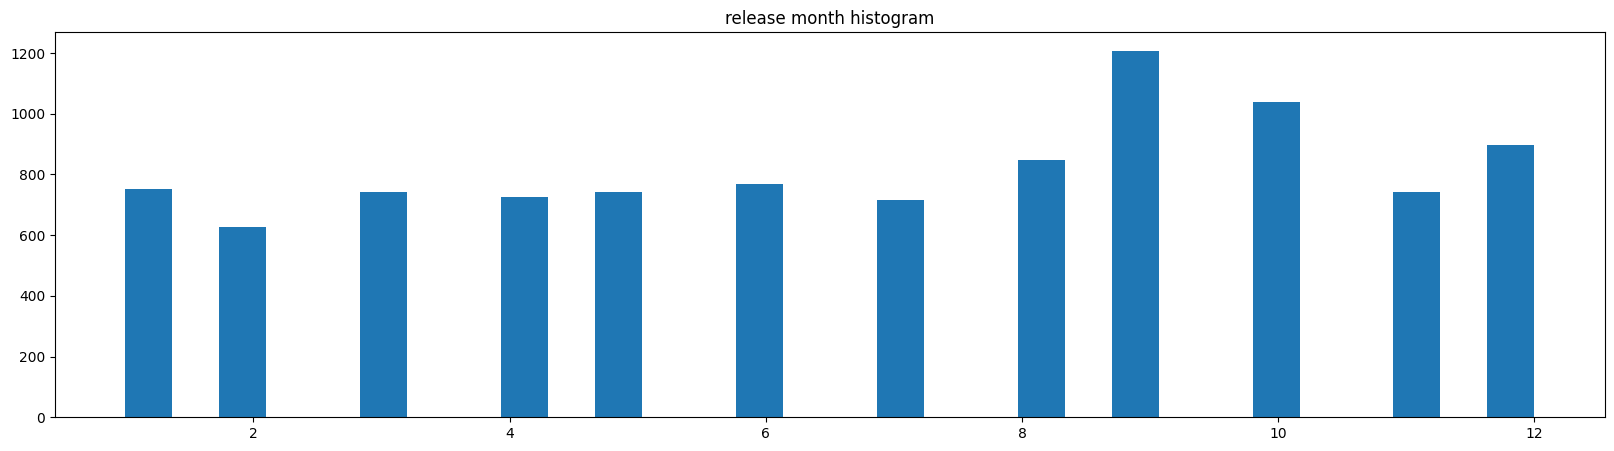

In [17]:
#here we are exploring the release month in 1d
df['release_month'].hist(grid=False,figsize=[20,5],bins=30);
pl.title("release month histogram");

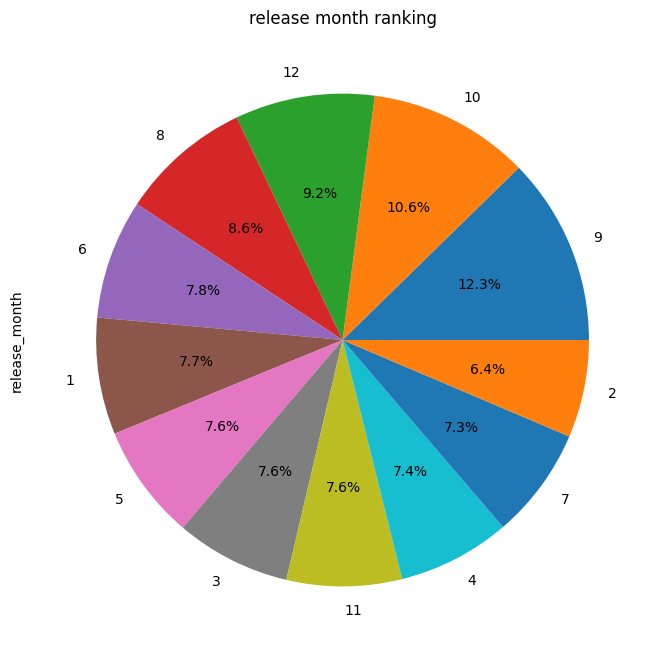

In [18]:

df['release_month'].value_counts().plot(kind='pie',figsize=(8,8), autopct='%1.1f%%',title="release month ranking");

**As we can see the movies release in in every month nearly evenly now we will see if the month affect the popularity or the average vote**

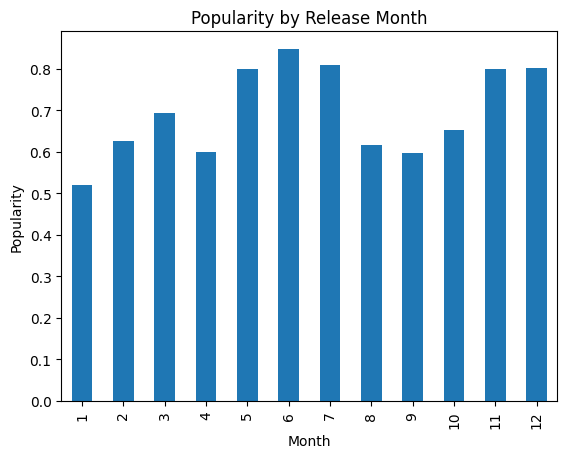

In [19]:
monthly_popularity = df.groupby('release_month')['popularity'].mean()

# Create a bar chart
monthly_popularity.plot(kind='bar', 
                        x='release_month', 
                        y='popularity', 
                        title='Popularity by Release Month',
                        xlabel="Month",
                        ylabel="Popularity",
                        legend= False
                       );



as we can see may,june,july,november,december is the hieghist in trems of popularity and january and september is the worst in terms of popularity so the month release have a slight effect on the popularity

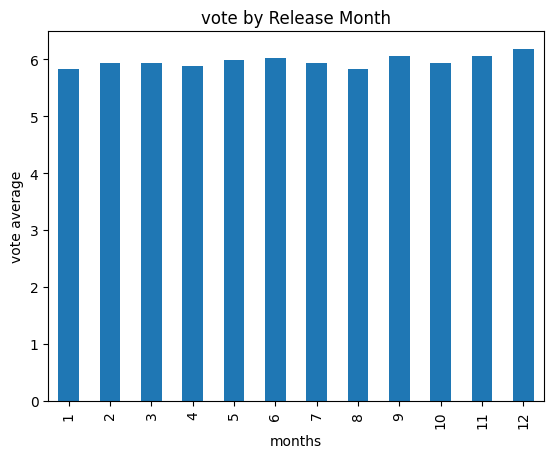

In [20]:
vote_average = df.groupby('release_month')['vote_average'].mean()

# Create a bar chart
vote_average.plot(kind='bar', 
                        x='release_month', 
                        y='vote', 
                        title='vote by Release Month',
                        xlabel="months",
                        ylabel="vote average",
                        legend= False
                       );


and in vote average the release month doesn't effect the vote which is something I didn't expect

### Research Question 2  (what is the most genres was made in the dataset and does the genere affect the the popularity)

In [21]:
# split genres string, at |, explode the list to rows
genres_df = df.assign(genres=df['genres'].str.split('|')).explode('genres')
genres_df.head()

,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_month,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,33.000000,150000000,1.513529e+09,Jurassic World,Colin Trevorrow,124.0,Action,Universal Studios|Amblin Entertainment|Legenda...,6,5562,6.500000,2015,137999936.0,1.392446e+09
0,33.000000,150000000,1.513529e+09,Jurassic World,Colin Trevorrow,124.0,Adventure,Universal Studios|Amblin Entertainment|Legenda...,6,5562,6.500000,2015,137999936.0,1.392446e+09
0,33.000000,150000000,1.513529e+09,Jurassic World,Colin Trevorrow,124.0,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,6,5562,6.500000,2015,137999936.0,1.392446e+09
0,33.000000,150000000,1.513529e+09,Jurassic World,Colin Trevorrow,124.0,Thriller,Universal Studios|Amblin Entertainment|Legenda...,6,5562,6.500000,2015,137999936.0,1.392446e+09
1,28.421875,150000000,3.784364e+08,Mad Max: Fury Road,George Miller,120.0,Action,Village Roadshow Pictures|Kennedy Miller Produ...,5,6185,7.101562,2015,137999936.0,3.481613e+08


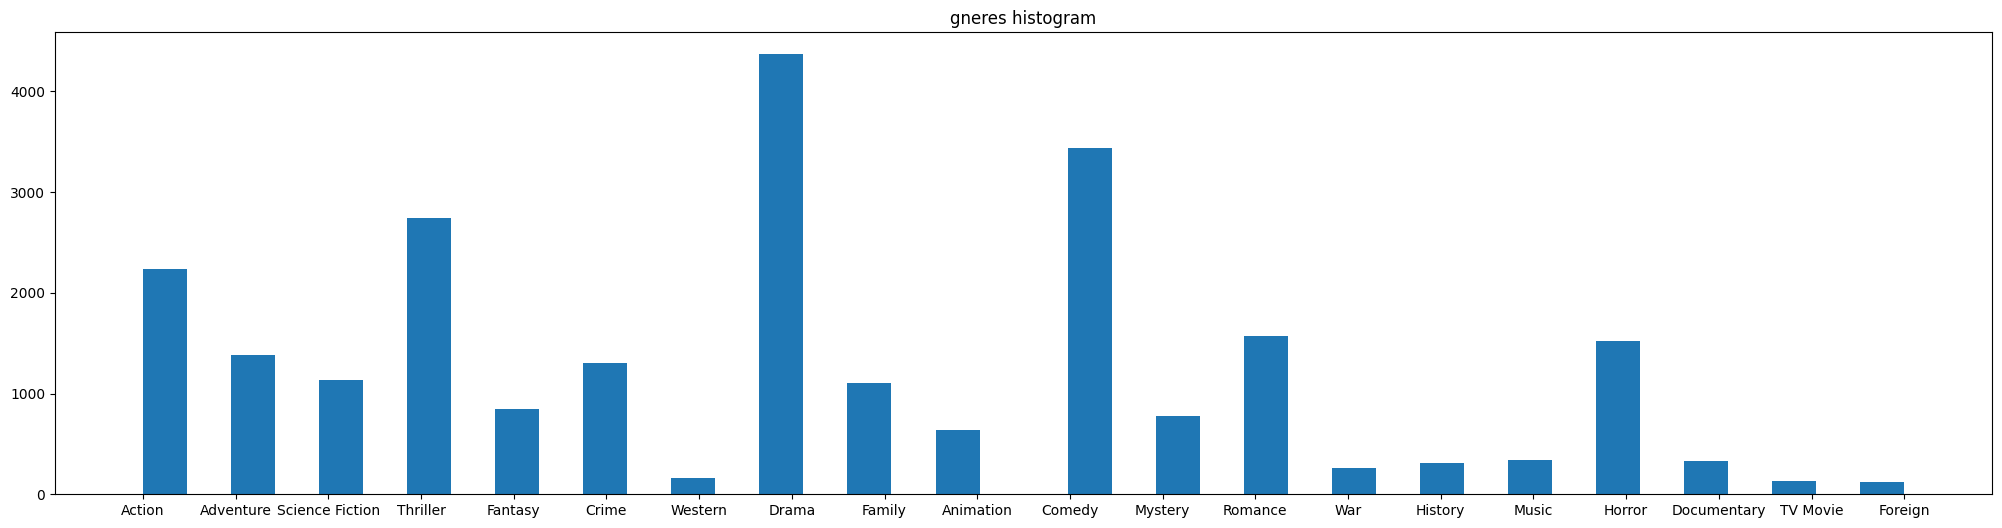

In [22]:
#here we are exploring the genres in 1d
genres_df['genres'].hist(grid=False,bins=40, figsize=[25,6]);
pl.title("gneres histogram");


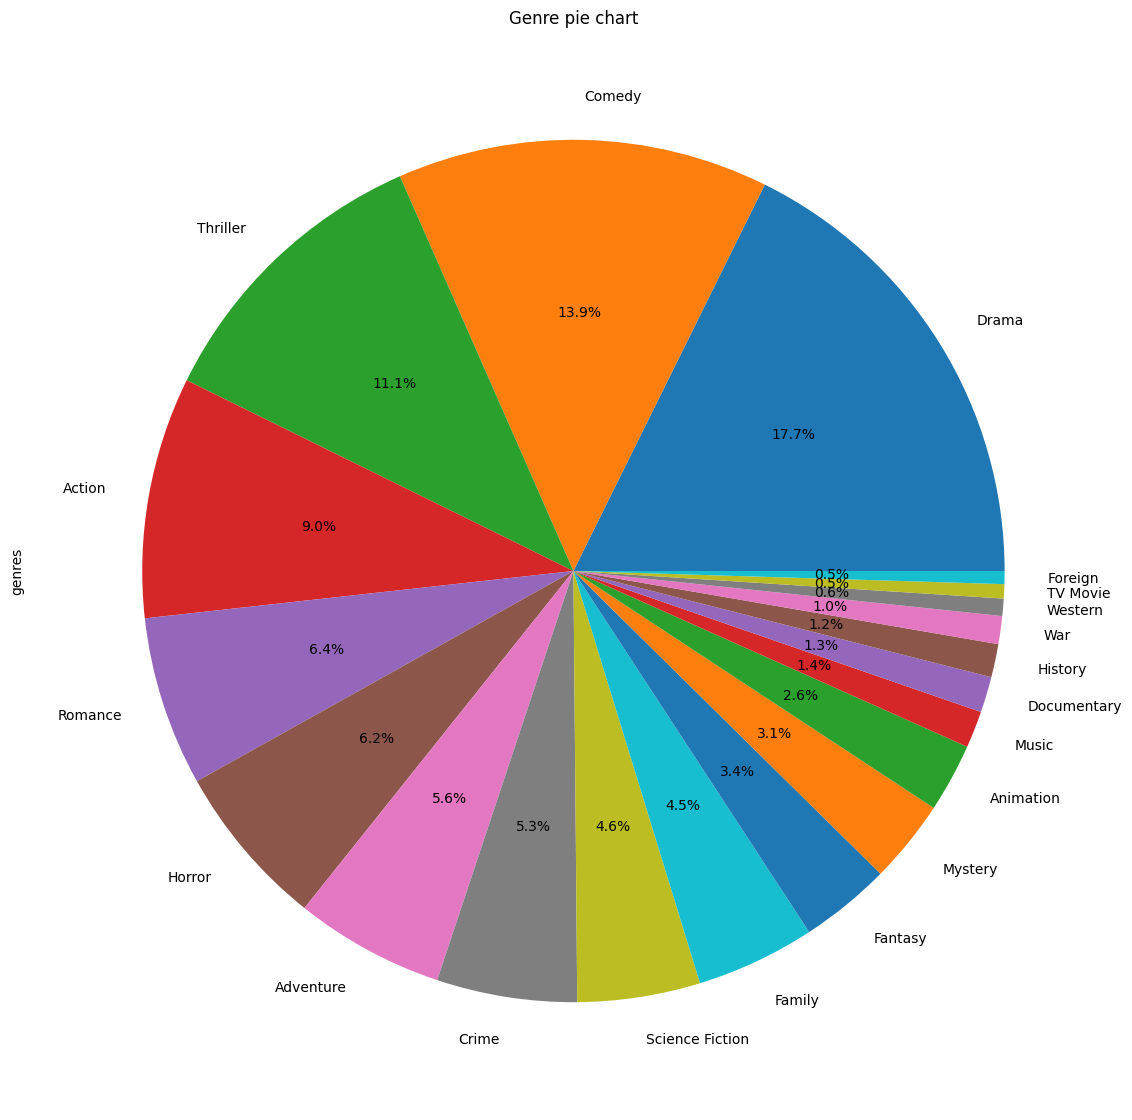

In [ ]:
genres_df['genres'].value_counts().plot(
    kind='pie',
    figsize=(14,14),
    autopct='%1.1f%%',
    legend= False,
    title="Genre pie chart"
                                       );


**we can see that darama is the number one genre choice for the production companys then comedy then thriller**

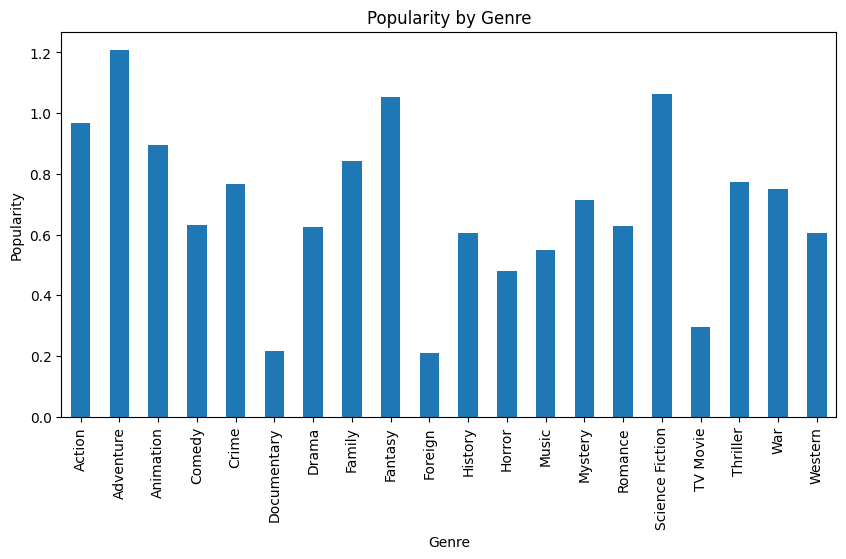

In [24]:
genre_average =genres_df.groupby('genres')['popularity'].mean()


#this for ploting in pie chart
genre_average.plot(
    kind='bar',
    figsize=(10, 5),
    stacked=True,
    title='Popularity by Genre',
    xlabel='Genre',
    ylabel='Popularity'
);


**But in terms of popularity the adventure then science fiction then fantsy are top performer in terms of popularity**

<a id='conclusions'></a>
## Conclusions

> finally I found that the month of release doesn't have an impact on the vote but there is some effect on the popularity and this a place to start investagating more it might lead to something helpfull for the industry but the genre it sure affect the popularity but the industry produce genres that not the most popular and this a place to see why and here is my dataset limitation is the budget and the revenue are both lacking because hlaf of the rows are zeros and this will not make the analysis near accurate so I couldn't anlayse in those columns and I think the directors affect on the movies is something should be considered in future analysises



In [25]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] Writing 641220 bytes to Investigate_a_Dataset.html
